In [1]:
import numpy as np 
import pandas as pd 
import os
#vizualize libraries**
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
px_template = "simple_white"

In [3]:
df1=pd.read_csv('/content/drive/MyDrive/HK5/archive/diabetes_binary_health_indicators_BRFSS2015.csv')
df1

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


##Kiểm tra data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df1.isnull().sum().sort_values(ascending=False)

Diabetes_binary         0
HighBP                  0
Education               0
Age                     0
Sex                     0
DiffWalk                0
PhysHlth                0
MentHlth                0
GenHlth                 0
NoDocbcCost             0
AnyHealthcare           0
HvyAlcoholConsump       0
Veggies                 0
Fruits                  0
PhysActivity            0
HeartDiseaseorAttack    0
Stroke                  0
Smoker                  0
BMI                     0
CholCheck               0
HighChol                0
Income                  0
dtype: int64

#Kiểm tra các giá trị duy nhất trong các biến khác nhau

In [6]:
unique_values = {}
for col in df1.columns:
    unique_values[col] = df1[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [7]:
df1.shape

(253680, 22)

In [8]:
#Kiểm tra các hàng trùng lặp trong tập dữ liệu df1 để loại bỏ chúng

duplicates = df1[df1.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


* Có 24206 hàng trùng lặp trong df1

In [9]:
#xóa trùng lặp trong hàng

df1.drop_duplicates(inplace=True)

In [10]:
#check shape
df1.shape

(229474, 22)

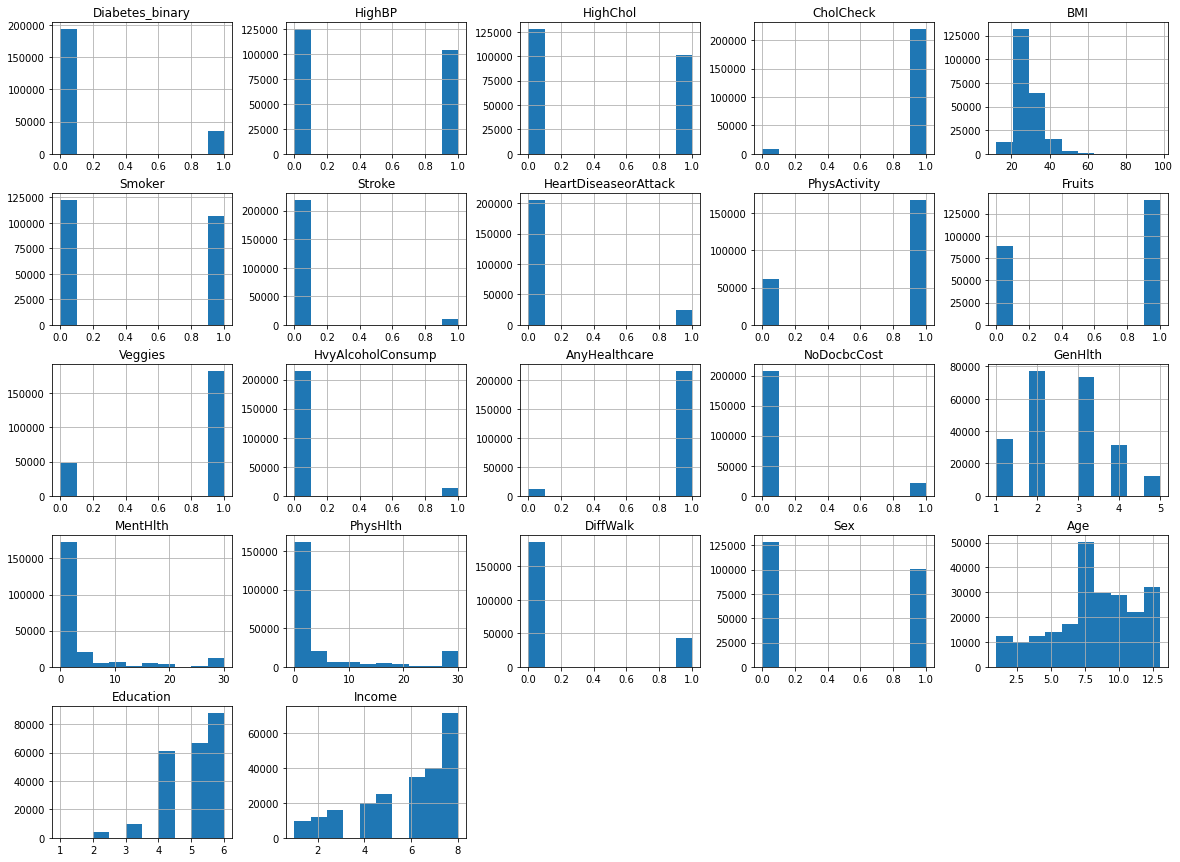

In [11]:
#sử dụng histgram để hiểu tập dữ liệu

df1.hist(figsize=(20,15));

#Tương quan giữa dữ liệu

In [12]:
#kiểm tra tương quan giữa các cột

df1.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,-0.008519,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907


#Sử dụng heatmap để hiểu rõ hơn về mối tương quan trong bộ dữ liệu df1

Text(0.5, 1.0, 'correlation of features')

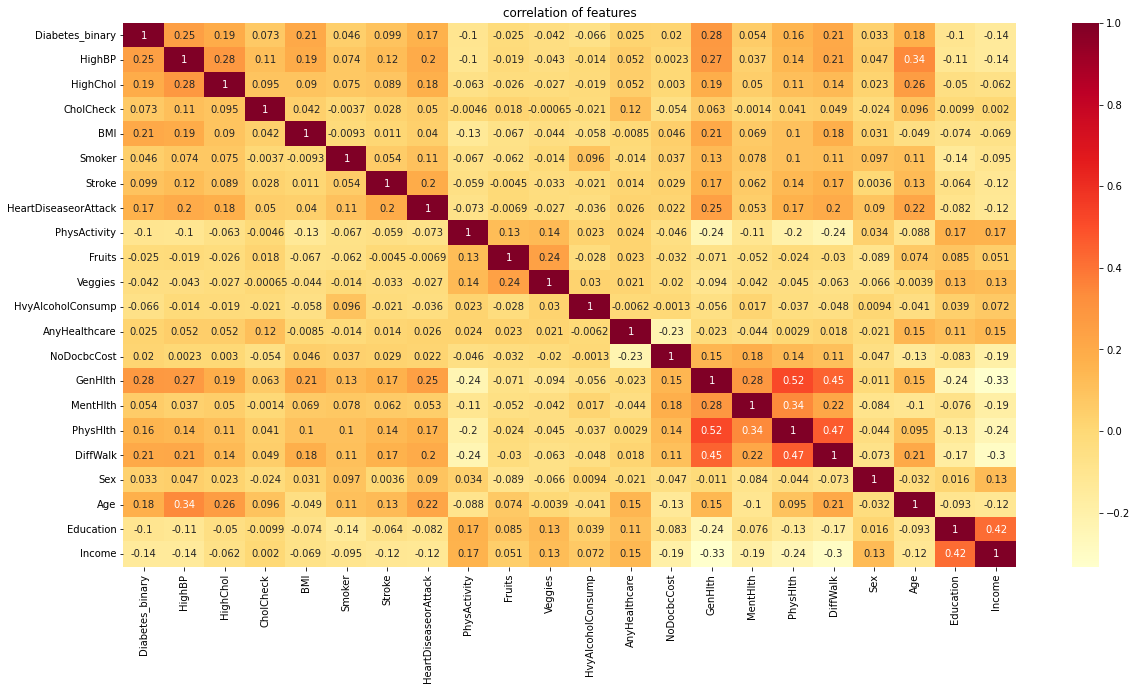

In [13]:
plt.figure(figsize=(20,10))

sns.heatmap(df1.corr(),annot=True , cmap ='YlOrRd')
plt.title("correlation of features")

*
cột GenHlth và PhysHlth có mối tương quanquan tích cực(positive relation)

cột GenHlth and Income có mối tương quan tiêu cực (negetive relation)

**correlation throw bar graph**

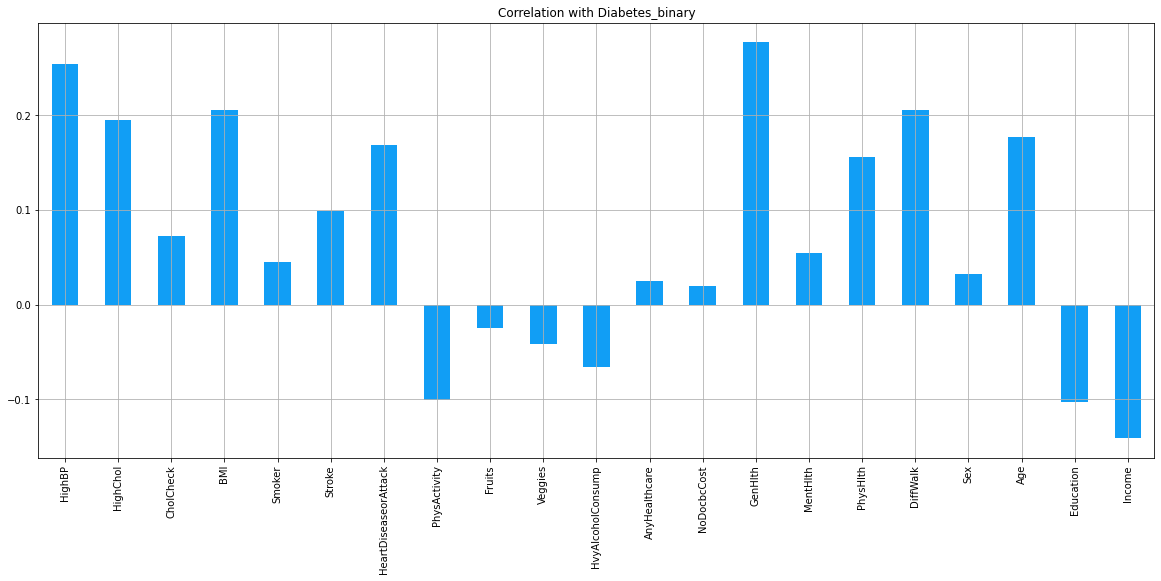

In [14]:
df1.drop('Diabetes_binary', axis=1).corrwith(df1.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="#119ef5");

* Mối quan hệ của cột Diabetes_binary với các cột khác 

1 . Fruits , AnyHealthcare , NoDocbccost and sex ít tương quan nhất vơi Diabetes_binary.

2 . HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk có mối tương quan đáng kể vớivới Diabetes_binary.Fruits

In [15]:
#Ta có thể loại bỏ các features ít tương quan nhất (Fruits , AnyHealthcare , NoDocbccost và sex )

df1.drop(['Fruits','AnyHealthcare','NoDocbcCost','Sex'] , inplace=True , axis=1)

In [16]:
df1.shape

(229474, 18)

In [17]:
df1['Diabetes_binary'].value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

#Tỷ lệ người mắc bệnh tiểu đường và không mắc bệnh tiểu đường

Text(0.5, 1.0, 'Không bệnh và có bệnh ')

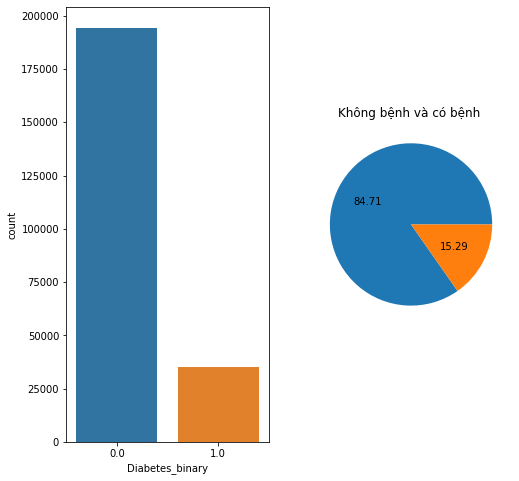

In [18]:
#par plot
warnings.filterwarnings('ignore')
figure1, plot1 = plt.subplots(1,2,figsize=(8,8))
sns.countplot(df1['Diabetes_binary'],ax=plot1[0])

#pie plot
plt.pie( df1['Diabetes_binary'].value_counts() ,autopct='%.02f' );
plt.title('Không bệnh và có bệnh ')

**Phân tích mối quan hệ của Diabetes_binary với các yếu tố chính gây ra bệnh tiểu đường**

HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies ,
GenHlth , PhysHlth , Age , Education , Income and DiffWalk

**HighBP's Relation với Diabetes_binary**

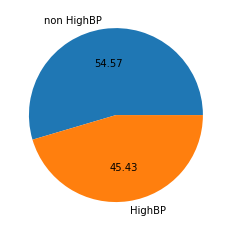

In [19]:

#kiểm tra mức trung bình của người có huyết áp cao(HighBP) và không cao (non HighBP) bằng biểu đồ pie
labels=["non HighBP","HighBP"]

plt.pie(df1["HighBP"].value_counts() , labels =labels ,autopct='%.02f' );

In [20]:
#số bệnh nhân ĐTĐ(đái tháo đường) có huyết áp cao

pd.crosstab(df1.HighBP ,df1.Diabetes_binary)

Diabetes_binary,0.0,1.0
HighBP,,
0.0,116522,8692
1.0,77855,26405


** Kiểm tra mối quan hệ B/W HighBP và Diabetes**

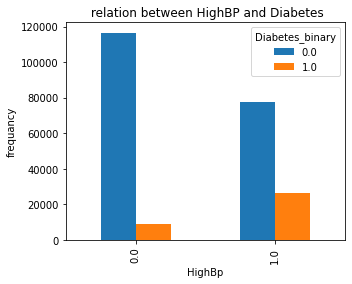

In [21]:
pd.crosstab(df1.HighBP ,df1.Diabetes_binary).plot(kind='bar',figsize=(5,4))

plt.title(' relation between HighBP and Diabetes')
plt.xlabel('HighBp')
plt.ylabel('frequancy')
plt.show()

**Mối quan hệ của Highcol với DiabetesBinary**

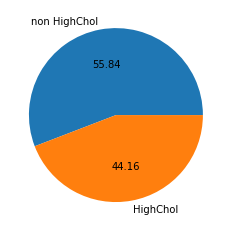

In [22]:
#kiểm tra mức trung bình của người HighChol và không HighChol 

labels=["non HighChol","HighChol"]

plt.pie(df1["HighChol"].value_counts() , labels =labels ,autopct='%.02f' );

In [23]:
# kiểm tra người bị bệnh có HighChol và không HighChol

pd.crosstab(df1.HighChol,df1.Diabetes_binary)

Diabetes_binary,0.0,1.0
HighChol,,
0.0,116528,11601
1.0,77849,23496


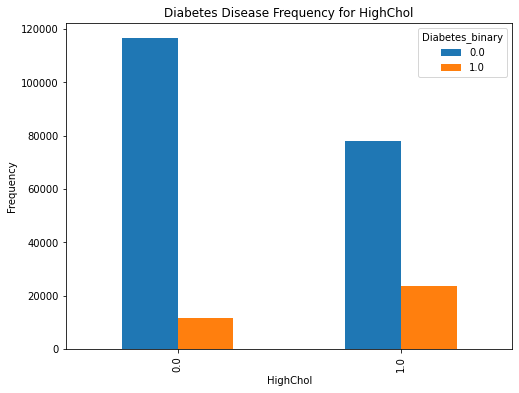

In [24]:
#kiểm tra mqhe của  B/W HighChol và Diabetes

pd.crosstab(df1.HighChol,df1.Diabetes_binary).plot(kind="bar",figsize=(8,6))

plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()

In [25]:

# kiểm tra mức trung bình của bệnh nhân tiểu đường với có  HighChol và không  HighChol

(df1.groupby("Diabetes_binary")["HighChol"].value_counts()/df1.groupby("Diabetes_binary")["HighChol"].count())*100

Diabetes_binary  HighChol
0.0              0.0         59.949480
                 1.0         40.050520
1.0              1.0         66.945893
                 0.0         33.054107
Name: HighChol, dtype: float64

* Kết luận:

HighChol đóng một vai trò quan trọng gây nên bệnh tiểu đường. Khi các trường hợp có HHighChol tăng lên, thì nguy cơ mắc bệnh tiểu đường cũng tăng lên.

#Kiểm tra kết hợp hai yếu tố HighBP và HighChol đối với việc gây bệnh**

In [26]:
(df1.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].value_counts()/df1.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                95.064283
                  1.0                 4.935717
        1.0       0.0                88.654690
                  1.0                11.345310
1.0     0.0       0.0                82.530936
                  1.0                17.469064
        1.0       0.0                69.351803
                  1.0                30.648197
Name: Diabetes_binary, dtype: float64

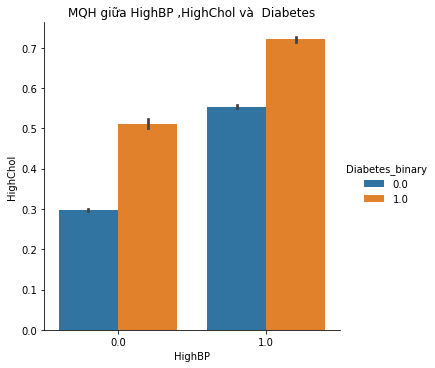

In [27]:
sns.catplot(x="HighBP" , y ="HighChol" , data = df1 , hue="Diabetes_binary" , kind="bar" );
plt.title("MQH giữa HighBP ,HighChol và  Diabetes")
plt.show()

* Kết luận: Theo biểu đồ ta thấy được, cả HighBP và HighChol đều làm tăng nguy cơ mắc bệnh tiểu đường

**Quan hệ của BMI's với Diabetes_binary**

In [28]:
df1['BMI']

0         40.0
1         25.0
2         28.0
3         27.0
4         24.0
          ... 
253675    45.0
253676    18.0
253677    28.0
253678    23.0
253679    25.0
Name: BMI, Length: 229474, dtype: float64

In [29]:
#kiểm tra giá trị BMI 

ax= px.treemap(df1,path=['BMI'],title="BMI counts")
ax.show()

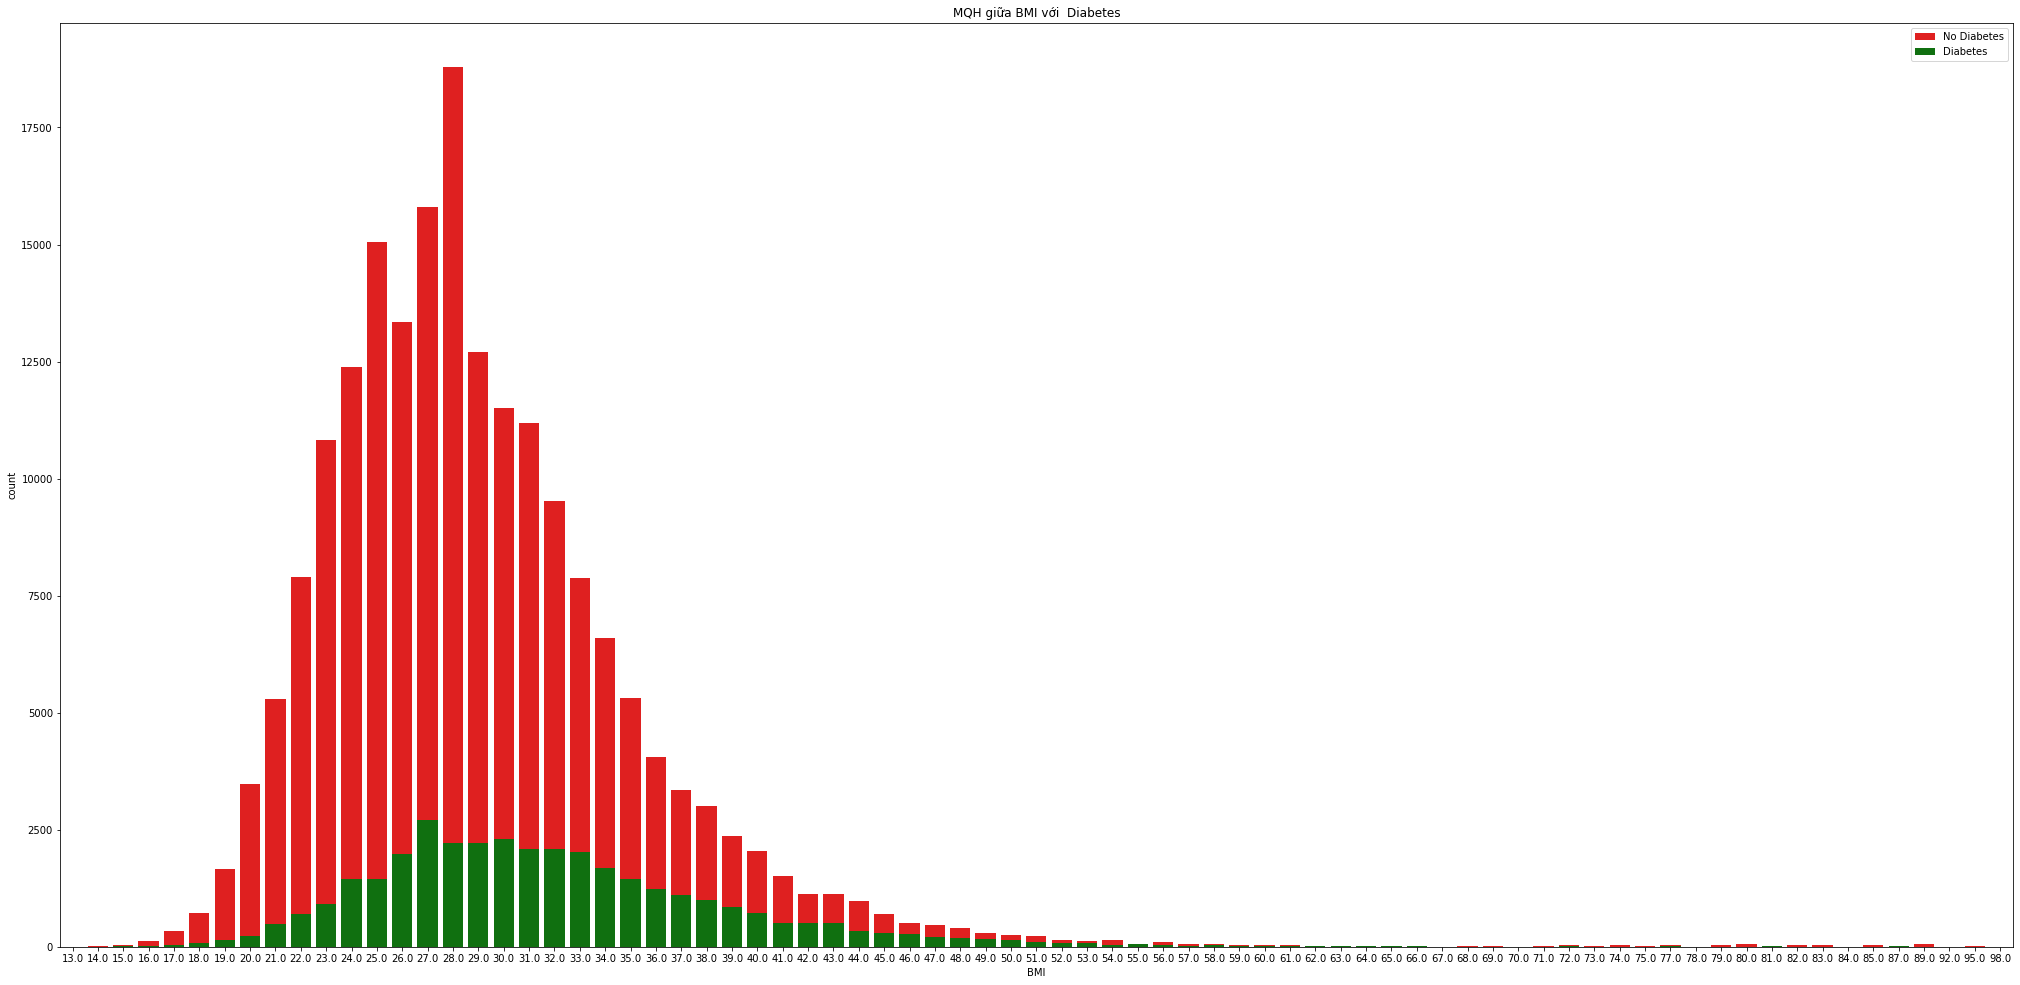

In [30]:
#biểu đồ plot của BMI 

plt.figure(figsize=(35, 17))
warnings.filterwarnings('ignore')

sns.countplot(df1.BMI[df1.Diabetes_binary == 0], color="r", label="No Diabetes")
sns.countplot(df1.BMI[df1.Diabetes_binary == 1], color="g", label="Diabetes" )
plt.title("MQH giữa BMI với  Diabetes")

plt.legend()
plt.show()

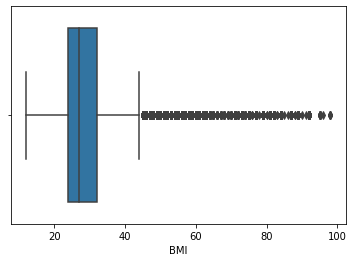

In [31]:
# kiểm tra các outliers

sns.boxplot(df1["BMI"])

**Chia ra 3 nhóm BMI**

* Group 1

In [32]:
#Kiểm tra bệnh nhân đái tháo đường có chỉ số BMI dưới 20

df1[(df1["BMI"]<=20)]["Diabetes_binary"].value_counts()

0.0    11650
1.0      545
Name: Diabetes_binary, dtype: int64

* Group 2

In [33]:
#nhóm thứ hai BMI lớn hơn 20 và nhỏ hơn 50

BMI_2 = df1.iloc[np.where((df1["BMI"]>20)&(df1["BMI"]<=50))]

print("BMI_2 : ", len(BMI_2))

BMI_2 = pd.DataFrame(BMI_2)

BMI_2 :  215104


* Group 3

In [34]:
#check Bệnh nhân đái tháo đường có chỉ số BMI (BMI>20 và BMI<=50)


df1[(df1["BMI"]>20) & (df1["BMI"]<=50)]["Diabetes_binary"].value_counts()

0.0    181255
1.0     33849
Name: Diabetes_binary, dtype: int64

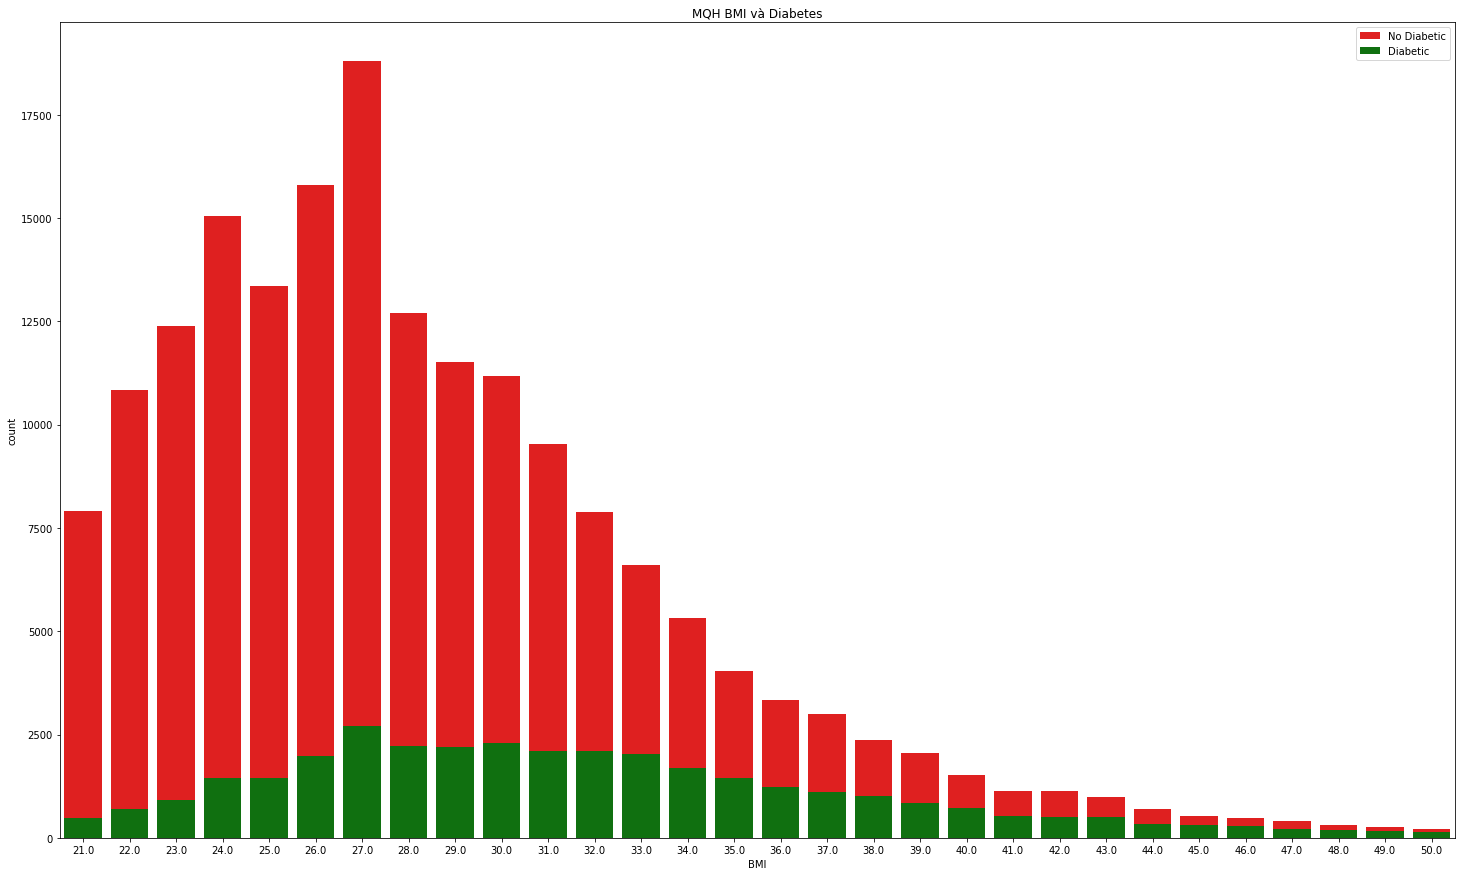

In [35]:
#dùng sơ đồ để xem số lượng bệnh nhân Tiểu đường và không Tiểu đường của Group 2 BMI 

plt.figure(figsize=(25, 15))
warnings.filterwarnings('ignore')

sns.countplot(BMI_2.BMI[df1.Diabetes_binary == 0], color="r", label="No Diabetic")
sns.countplot(BMI_2.BMI[df1.Diabetes_binary == 1], color="g", label="Diabetic")
plt.title("MQH BMI và Diabetes")

plt.legend()

In [36]:
#Check bệnh nhân có BMI trong khoảng(BMI>50 and BMI=100)


df1[(df1["BMI"]>50) & (df1["BMI"]<=100)]["Diabetes_binary"].value_counts()

0.0    1472
1.0     703
Name: Diabetes_binary, dtype: int64

* Kết luận:
- Hầu hết số người mắc bệnh tiểu đường có chỉ số BMI nằm trong khoảng từ 20 đến 50

- 215104 người có BMI nằm trong khoảng từ 20 đến 50

- 33849 bệnh nhân tiểu đường có chỉ số BMI từ 20 đến 50

nên có thể nói nhóm BMI thứ 2 có liên quanquan đáng kể đến bệnh tiểu đường

Ngoài ra cũng có những BMI ngoại lệ

**MQH giữa người hút thuốc và bệnh tiểu đường

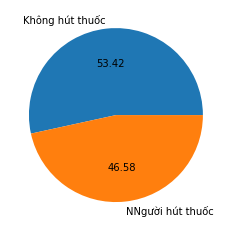

In [37]:
#Kiểm tra số người hút thuốc và không hút

labels=["Không hút thuốc","NNgười hút thuốc"]

plt.pie(df1["Smoker"].value_counts() , labels =labels ,autopct='%.02f' );

In [38]:
# kiểm tra số lượng bệnh nhân tiểu đường có hút thuốc và không hút thuốc

pd.crosstab(df1.Smoker,df1.Diabetes_binary)

Diabetes_binary,0.0,1.0
Smoker,,
0.0,105711,16874
1.0,88666,18223


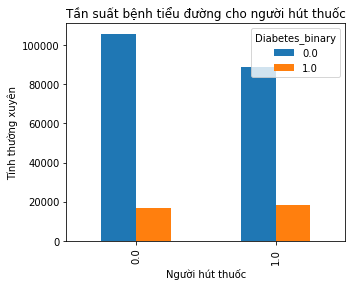

In [39]:

pd.crosstab(df1.Smoker,df1.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Tần suất bệnh tiểu đường cho người hút thuốc')
plt.xlabel("Người hút thuốc")
plt.ylabel('Tính thường xuyên')
plt.show()

* Kết luận:

Theo dữ liệu này, chỉ hút thuốc thì ít gây nên bệnh tiểu đường 
Nhưng Hút thuốc lá có hại cho sức khỏe



**MQH giữa việc tiêu thụ nhiều bia rượu và bệnh tiểu đường**

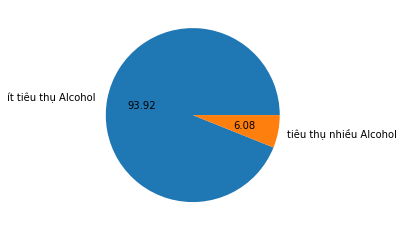

In [40]:
#Ktr mức trung bình tiêu thụ bia rượu 

labels=["ít tiêu thụ Alcohol ","tiêu thụ nhiều Alcohol "]

plt.pie(df1["HvyAlcoholConsump"].value_counts() , labels =labels ,autopct='%.02f' );

In [41]:
#Ktra bệnh nhân tiểu đường với việc tiêu thụ nhiều Alcohol và ít tiêu thụ Alcohol

pd.crosstab(df1.HvyAlcoholConsump,df1.Diabetes_binary)

Diabetes_binary,0.0,1.0
HvyAlcoholConsump,,
0.0,181259,34265
1.0,13118,832


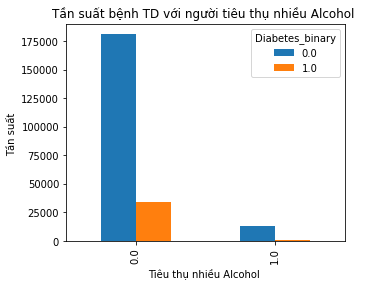

In [42]:
# MQH giữa tiêu thụ bia rượu và bệnh tiểu đường 

pd.crosstab(df1.HvyAlcoholConsump,df1.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Tần suất bệnh TD với người tiêu thụ nhiều Alcohol ')
plt.xlabel("Tiêu thụ nhiều Alcohol ")
plt.ylabel('Tần suất ')
plt.show()

* Kết luận:

Theo dữ liệu này, chưa đủ thông tin để kết luận ảnh hưởng của HvyAlcoholConsump đối với bệnh tiểu đường.

Nhưng Rượu bia có hại cho sức khỏe

**Kết hợp 2 yếu tố hút thuốc(Smoker) và tiêu thụ rượu bia nhiều (HvyAlcoholConsump) ảnh hưởng đến bệnh tiểu đường 

In [43]:
(df1.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].value_counts()/df1.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].count())*100


Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                85.851732
                           1.0                14.148268
        1.0                0.0                95.585492
                           1.0                 4.414508
1.0     0.0                0.0                81.993372
                           1.0                18.006628
        1.0                0.0                93.216438
                           1.0                 6.783562
Name: Diabetes_binary, dtype: float64

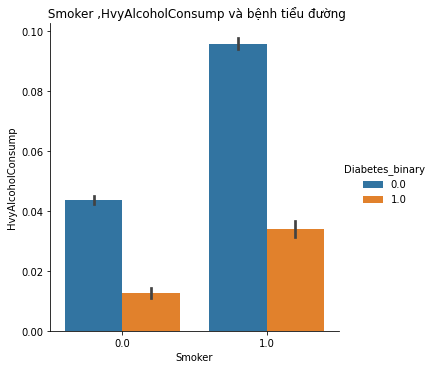

In [44]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = df1 , hue="Diabetes_binary"  , kind="bar"  );  
plt.title(" Smoker ,HvyAlcoholConsump và bệnh tiểu đường")

plt.show()

* Kết luận:
 Hút thuốc và uống rượu bia nhiều cùng nhau làm tăng nguy cơ mắc bệnh tiểu đường

**Tác động Đột quỵ và Nhồi máu cơ tim với Bệnh tiểu đường**

In [45]:
(df1.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].value_counts()/df1.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].count())*100

Stroke  HeartDiseaseorAttack  Diabetes_binary
0.0     0.0                   0.0                87.157808
                              1.0                12.842192
        1.0                   0.0                68.549325
                              1.0                31.450675
1.0     0.0                   0.0                74.291115
                              1.0                25.708885
        1.0                   0.0                58.434959
                              1.0                41.565041
Name: Diabetes_binary, dtype: float64

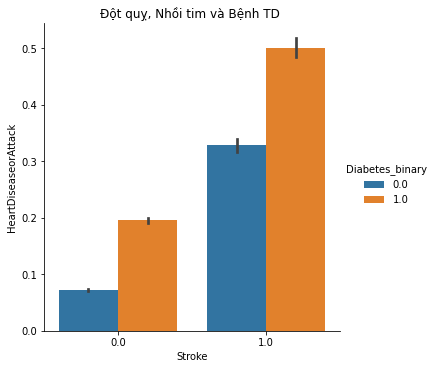

In [46]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = df1 , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Đột quỵ, Nhồi tim và Bệnh TD ")
plt.show()

* Kết luận:
Đột quỵ và bệnh tim làm tăng nguy cơ mắc bệnh Tiểu đường

In [47]:
#Sức khỏe tinh thần liên quan đến bệnh TD 

pd.crosstab(df1.MentHlth,df1.Diabetes_binary)

Diabetes_binary,0.0,1.0
MentHlth,,
0.0,129170,23155
1.0,7495,812
2.0,11185,1507
3.0,6377,924
4.0,3285,489
5.0,7690,1223
6.0,824,164
7.0,2685,405
8.0,529,110


* Kết Luận: MentHlth là yếu tố chính gây ra bệnh tiểu đường. Khi sức khỏe tinh thầnthần không ổn định trong thời gian dài thì nguy cơ mắc bệnh tiểu đường sẽ tăng lên.

**Giáo dục và bệnh TD**

In [48]:
pd.crosstab(df1.Education,df1.Diabetes_binary)

Diabetes_binary,0.0,1.0
Education,,
1.0,127,47
2.0,2857,1183
3.0,7171,2296
4.0,50092,11032
5.0,56133,10311
6.0,77997,10228


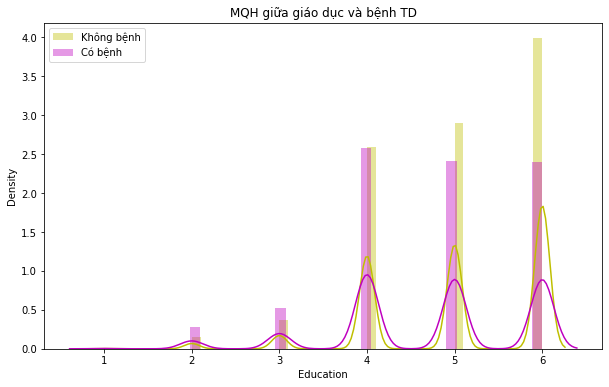

In [49]:
plt.figure(figsize=(10,6))
warnings.filterwarnings('ignore')

sns.distplot(BMI_2.Education[df1.Diabetes_binary == 0], color="y", label="Không bệnh" )
sns.distplot(BMI_2.Education[df1.Diabetes_binary == 1], color="m", label="Có bệnh" )
plt.title("MQH giữa giáo dục và bệnh TD")

plt.legend()

*Được giáo dục kiến thức đầy đủ sẽ giảm nguy cơ mắc bệnh

**Mức thu nhập**

In [50]:
pd.crosstab(df1.Income,df1.Diabetes_binary)

Diabetes_binary,0.0,1.0
Income,,
1.0,7408,2383
2.0,8670,3086
3.0,12356,3564
4.0,15906,4047
5.0,20837,4489
6.0,29697,5260
7.0,34905,5226
8.0,64598,7042


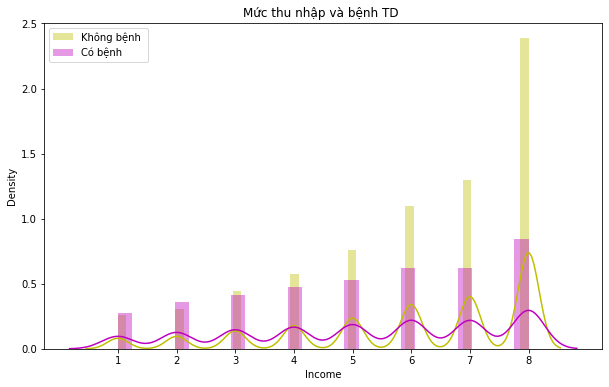

In [51]:
plt.figure(figsize=(10,6))
warnings.filterwarnings('ignore')

sns.distplot(BMI_2.Income[df1.Diabetes_binary == 0], color="y", label="Không bệnh " )
sns.distplot(BMI_2.Income[df1.Diabetes_binary == 1], color="m", label="Có bệnh " )
plt.title("Mức thu nhập và bệnh TD ")
plt.xticks(df1["Income"].unique())

plt.legend()

* Những người có thu nhập thấp hơn có nhiều nguy cơ mắc bệnh tiểu đường hơn những người có thu nhập cao hơn

**Độ tuổi**

In [52]:
pd.crosstab(df1.Age,df1.Diabetes_binary)

Diabetes_binary,0.0,1.0
Age,,
1.0,5433,78
2.0,6924,140
3.0,9709,314
4.0,11604,625
5.0,12991,1049
6.0,15539,1741
7.0,20049,3072
8.0,23031,4241
9.0,23997,5681


**Độ tuổi cũng ảnh hưởng đến nguy cơ mất bệnh **

**Vận động khó khăn**

In [53]:
pd.crosstab(df1.Diabetes_binary,df1.DiffWalk)

DiffWalk,0.0,1.0
Diabetes_binary,,
0.0,164866,29511
1.0,21983,13114


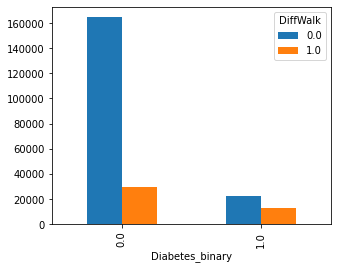

In [54]:
pd.crosstab(df1.Diabetes_binary,df1.DiffWalk).plot(kind='bar', figsize=(5,4))

**Người vận động khó khăn, ít vận động có nhiều nguy cơ bị bệnh hơn